In [1]:
%matplotlib inline
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import norm
np.random.seed(0)
import seaborn as sns
import random as rnd
import csv
import random
import math
import operator
import copy

In [2]:
def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data
def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

In [43]:
class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
             r[:,c] = p*g.pdf(self.X[:,0])
             #temp = g.pdf(self.X[:,0])
            #print(p)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        
        for i in range(len(r)):
            # Write code here
            r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i])
            pass
        
        #print(r)
        
        return r
    
    def plot(self,r):
        
        fig = plt.figure(figsize=(5,5))
        ax0 = fig.add_subplot(111)
        Y=np.zeros(shape=(self.X.shape[0],self.X.shape[1]))
        colors=np.zeros(shape=(len(r),3))
        for i in range(len(r)):
            colors[i]=np.array([r[i][0],r[i][1],r[i][2]])
        
        ax0.scatter(self.X,Y,c=colors,s=100)
        #for i in range(len(r)):    
         #   ax0.scatter(self.X[i,:],0,c=colors,s=50)
        
        """Plot the gaussians"""
        #print(self.var[0])
        
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g,c=c)
    def plot1(self,log_likelihoods):
            fig2 = plt.figure(figsize=(5,5))
            ax1 = fig2.add_subplot(111) 
            ax1.set_title('Log-Likelihood')
            ax1.plot(range(0,self.iterations,1),log_likelihoods)
            
    def run(self):
        log_likelihoods = []
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)

            #print(len(r[0]))
            """Plot the data"""
            self.plot(r)
            #self.plot1()
            
            log_likelihoods.append(np.log(np.sum([k*norm(loc=self.mu[i],scale=self.var[j]).pdf(self.X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.var)))])))
            """M-Step"""

            """calculate m_c"""
            m_c = []
            # write code here
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m)
            
            """calculate pi_c"""
            # write code here
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c))
            
            """calculate mu_c"""
            # write code here
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c 


            """calculate var_c"""
            # var_c = []
            #write code here
            for c in range(len(r[0])):
                temp=(1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c]))
                self.var[c]=temp[0][0]
            #self.var = var_c
            #print(self.var)
            plt.show()   
        self.plot1(log_likelihoods)
        plt.show()

In [44]:
data = load("E:\\SMAI_A2\\Q2\\Question-2\\dataset1.pkl")
#print(data)

In [45]:
type(data)

numpy.ndarray

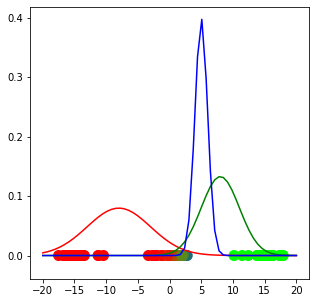

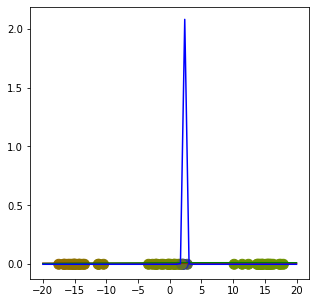

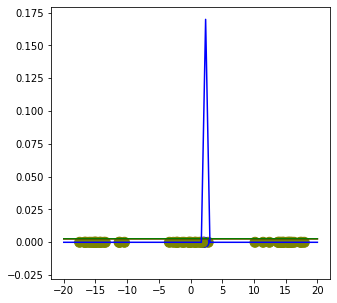

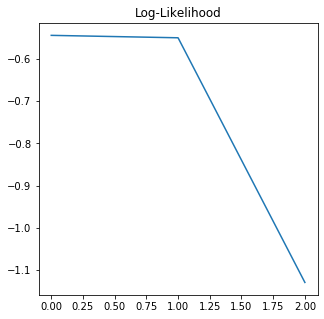

In [46]:
g = GMM1D(data,3,[-8,8,5],[1/3,1/3,1/3],[5,3,1])
g.run()